# Examen del 2do Parcial

ANA-SOPHIA REDSTONE MERELES (ahora si le pongo mi nombre porque creo la vez pasada se me fue jiji)

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [17]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import mne  
from networkx.algorithms import community

In [18]:
# Ejercico 1 - Coactivación 

mat = sio.loadmat (r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\Coactivation_matrix.mat")

print(mat.keys())

possible = [k for k in mat.keys() if not k.startswith('__')]
possible



dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


['Coactivation_matrix', 'Coord']

In [19]:
matriz1 = mat[possible[0]]  

print("shape:", matriz1.shape)


shape: (638, 638)


Small-world sigma (y datos): (np.float64(0.6242379559402793), {'C': 0.0662834953644899, 'L': 2.2148737961545844, 'C_rand': np.float64(0.09169422639407702), 'L_rand': np.float64(1.9126510599417006)})
Comunidades detectadas (nodos por comunidad): [[0, 1, 4, 8, 9, 11, 13, 14, 21, 22, 23, 24, 25, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 65, 72, 81, 82, 83, 84, 85, 86, 90, 92, 99, 101, 102, 105, 108, 114, 117, 123, 132, 134, 136, 137, 138, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 175, 177, 179, 180, 182, 183, 187, 188, 189, 190, 191, 196, 198, 199, 200, 201, 204, 205, 207, 209, 210, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 239, 247, 249, 272, 276, 287, 294, 295, 297, 299, 306, 307, 310, 311, 312, 313, 314, 315, 316, 317, 318, 339, 427, 428, 431, 435, 438, 443, 445, 446, 448, 449, 451, 456, 466, 467, 468, 469, 470, 471, 499, 501, 508, 512, 514, 51

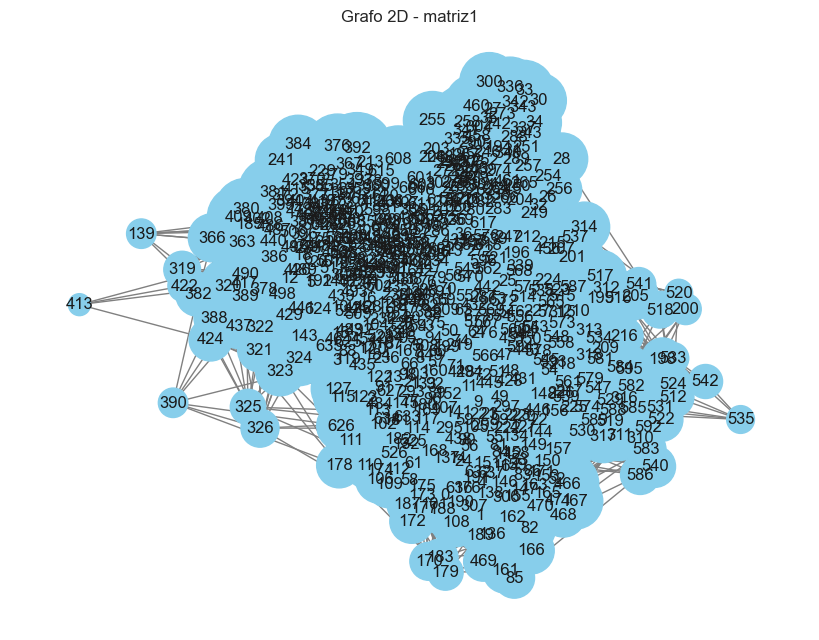

In [20]:
G1 = matriz_a_grafo(matriz1, weighted=True) # para hacer el grafo

sigma_res = small_world_sigma(G1, rand_iter=30, seed=42) # mundo pequeño , dato curioso sabía que en disney hay una atracción llamada small world esta muy cute !
print("Small-world sigma (y datos):", sigma_res)

coms = encontrar_communities_louvain_like(G1) # comunidades y la modularidad 
print("Comunidades detectadas (nodos por comunidad):", coms)

hubs_top5 = detectar_hubs_por_grado(G1, method='top_k', k=5) # HUBS de los creme de la creme top 5 
print("Hubs (top5):", hubs_top5)

eff_global = nx.global_efficiency(G1) # esta cosa de función es para eff global y la local , ya sabes cositas que ya vimos con Oswa
eff_local = nx.local_efficiency(G1)
print("Eficiencia global:", eff_global)
print("Eficiencia local:", eff_local)

grado = dict(G1.degree()) # el grado para cada nodo
print("Grado (nodo: grado):", grado)

grafo_2D_plot(G1, title='Grafo 2D - matriz1') # 2D , pido perdón por tanta nota pero es para aprendermelo y para entretenerme


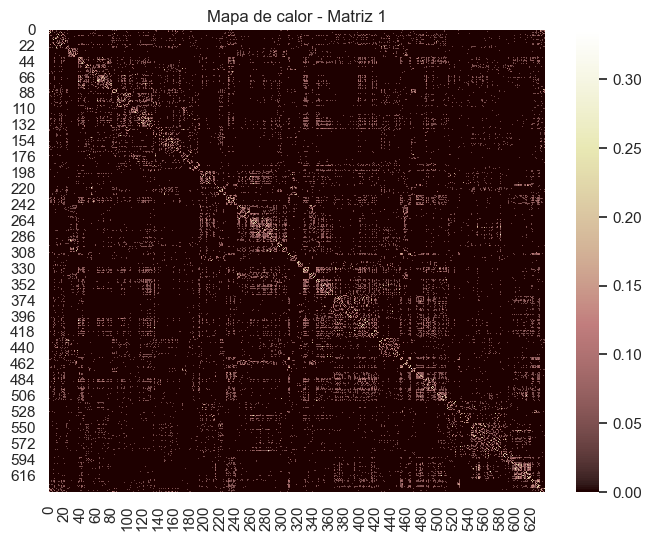

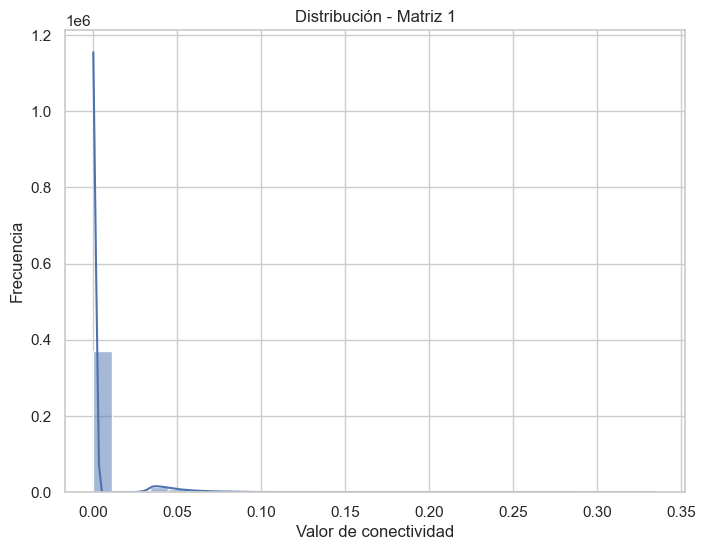

Percentil 25: 0.0
Percentil 50 (mediana): 0.0
Percentil 75: 0.0
Grafo 2D - threshold >= 0.0000  — Nodos: 638 Aristas: 18625


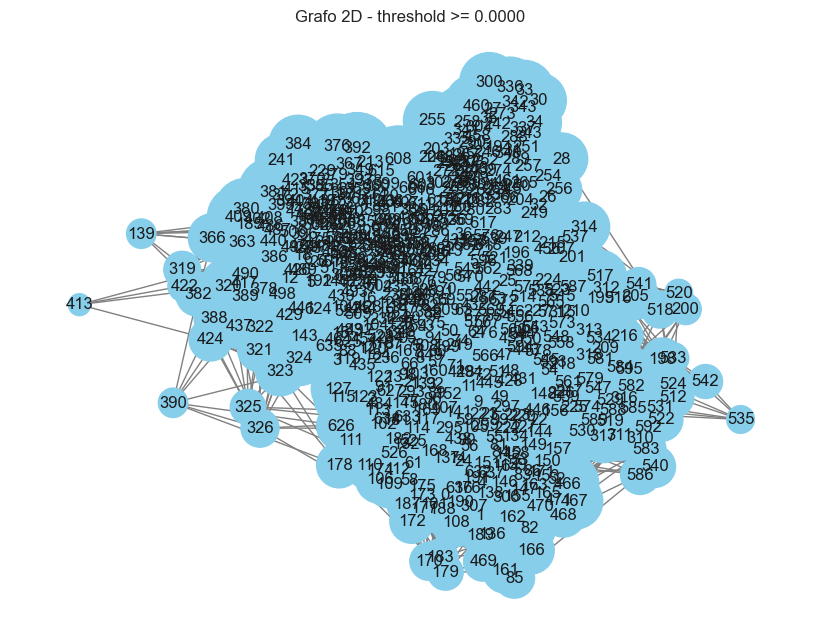

Grafo 2D - threshold >= 0.0000  — Nodos: 638 Aristas: 18625


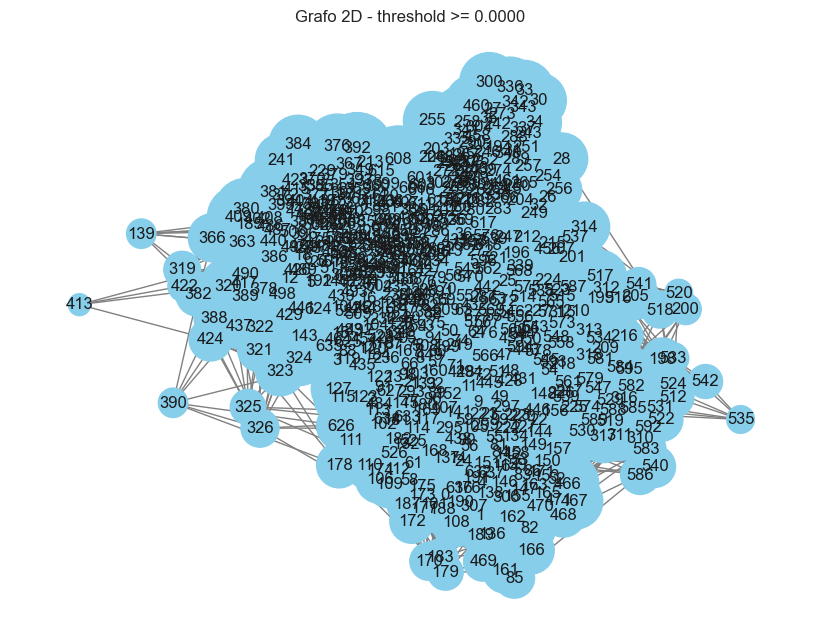

Grafo 2D - threshold >= 0.0000  — Nodos: 638 Aristas: 18625


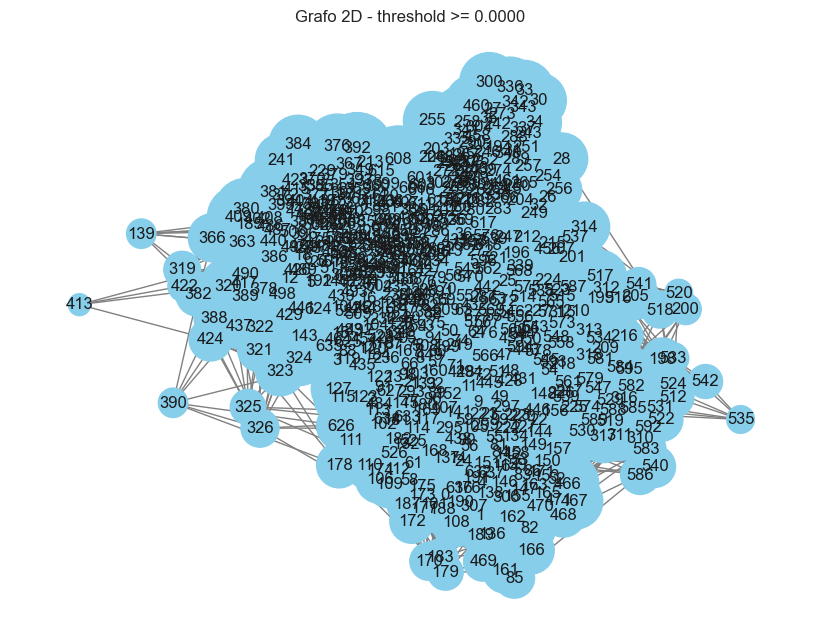

In [21]:
# Ejercicio 2 - Coactivación

plt.figure(figsize=(8,6)) # Mapita de colorcito 
sns.heatmap(matriz1, cmap='pink')
plt.title("Mapa de calor - Matriz 1")
plt.show()

vals = matriz1.flatten() # distribución uwu
vals = vals[~np.isnan(vals)]
plt.figure(figsize=(8,6))
sns.histplot(vals, bins=30, kde=True)
plt.title("Distribución - Matriz 1")
plt.xlabel("Valor de conectividad")
plt.ylabel("Frecuencia")
plt.show()

p25, p50, p75 = np.percentile(vals, [25,50,75]) # percentiles 0.25 , 0.5 y 0.75 . estas chunches en bioestadistica me acuerdo me hacián llorar
print("Percentil 25:", p25)
print("Percentil 50 (mediana):", p50)
print("Percentil 75:", p75)

thresholds = [p25, p50, p75] # esto es pa crear 3 grafitos 2D por medio del filtrado de los thresholds
for t in thresholds:
    A_thr = np.where(matriz1 >= t, matriz1, 0)   # mantiene conexiones menores que t 
    G_thr = matriz_a_grafo(A_thr, weighted=True)
    title = f"Grafo 2D - threshold >= {t:.4f}"
    print(title, " — Nodos:", G_thr.number_of_nodes(), "Aristas:", G_thr.number_of_edges())
    grafo_2D_plot(G_thr, title=title)


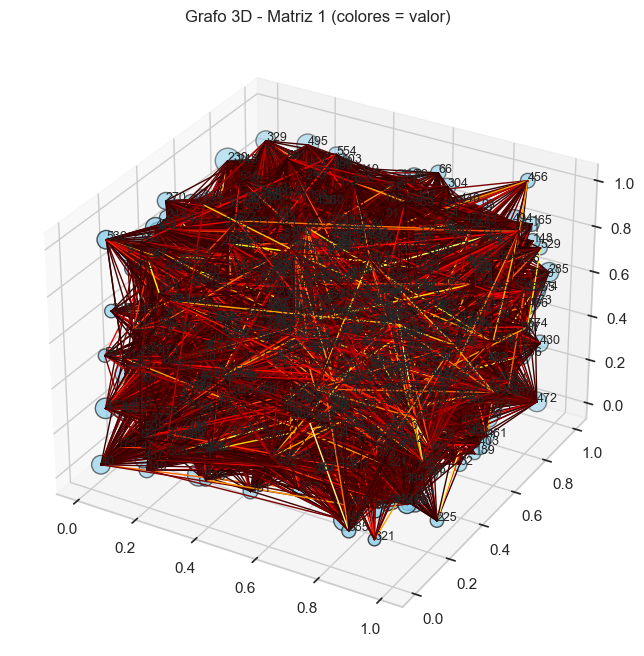

In [22]:
# Ejercicio 3 - Coactivación 

grafo_3D_plot(matriz1, node_size_scale=300, cmap='hot', title='Grafo 3D - Matriz 1 (colores = valor)') # se ve loquísimo espero si este bien jiji 

In [23]:
# Ejercicio 4 - DATASET _chb01_01.edf_

raw = mne.io.read_raw_edf(r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\chb01_01.edf", preload=True, verbose=False) # acuerdate por dios para todos estos ejercicios es importante delimitar donde esta el documento y definir ojo PIOJO
print(raw.info)  # Con esta función visulizamos los canales (sfreq)

sfreq = raw.info['sfreq'] # ahora esta funcióncita es para elegir un solo intervalo considerado razonable
dur = 60  # pues ya deberías saberlo pero por si las chanclas de moises son segundos :)
n_samples = int(sfreq * dur)
data, times = raw[: , :n_samples]  # formato de los datos es decir su forma: (n_channels, n_samples)
print("data shape:", data.shape)

C:\Users\Ana-Sophia Redstone\AppData\Local\Temp\ipykernel_20068\3073154908.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\chb01_01.edf", preload=True, verbose=False) # acuerdate por dios para todos estos ejercicios es importante delimitar donde esta el documento y definir ojo PIOJO


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Surrogate>
>
data shape: (23, 15360)


Small-world sigma (EEG): (np.float64(0.0948434232162949), {'C': 0.0948434232162949, 'L': 1.0, 'C_rand': np.float64(1.0), 'L_rand': np.float64(1.0)})
Comunidades EEG: [[0, 1, 2, 4, 5, 6, 7, 8, 12, 20], [9, 10, 13, 14, 16, 18, 19, 21, 22], [3, 11, 15, 17]]
Hubs EEG (top5): [(0, 22), (1, 22), (2, 22), (3, 22), (4, 22)]
Eficiencia global EEG: 1.0
Eficiencia local EEG: 1.0
Grados EEG (nodos): {0: 22, 1: 22, 2: 22, 3: 22, 4: 22, 5: 22, 6: 22, 7: 22, 8: 22, 9: 22, 10: 22, 11: 22, 12: 22, 13: 22, 14: 22, 15: 22, 16: 22, 17: 22, 18: 22, 19: 22, 20: 22, 21: 22, 22: 22}


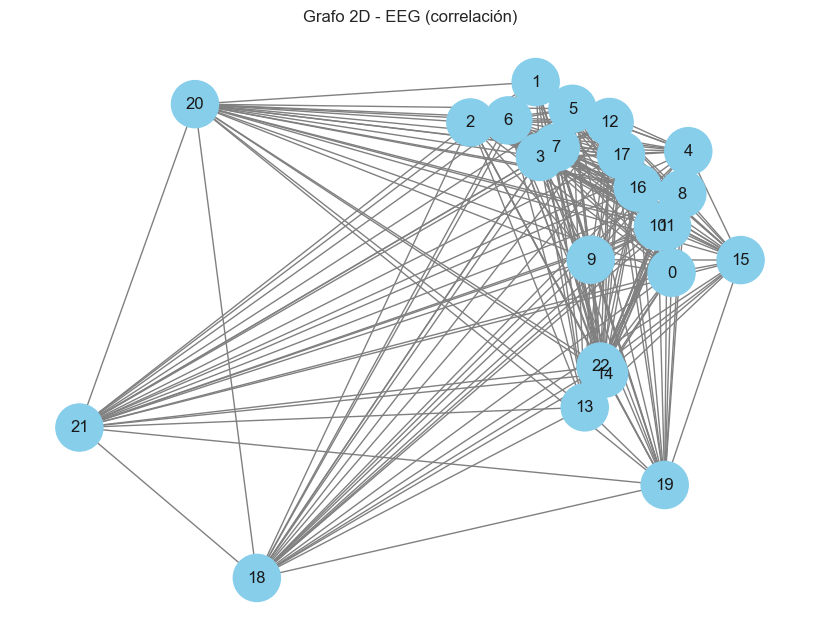

In [24]:
corr = np.corrcoef(data)
np.fill_diagonal(corr, 0) # OJO PIOJO se deden quitar los nans y reemplazar con 0 la diagonal
corr = np.nan_to_num(corr)

G_eeg = matriz_a_grafo(corr, weighted=True)

sigma_eeg = small_world_sigma(G_eeg, rand_iter=30, seed=42) # mundo chiquilin 
print("Small-world sigma (EEG):", sigma_eeg)

coms_eeg = encontrar_communities_louvain_like(G_eeg) # comunidad como la comunidad unam, pido perdón espero este medio divertido leyendo mi esquizofrenia
print("Comunidades EEG:", coms_eeg)

hubs_eeg = detectar_hubs_por_grado(G_eeg, method='top_k', k=5) # HUBS
print("Hubs EEG (top5):", hubs_eeg)

eg = nx.global_efficiency(G_eeg) # efiCIENCIA
el = nx.local_efficiency(G_eeg)
print("Eficiencia global EEG:", eg)
print("Eficiencia local EEG:", el)

grados_eeg = dict(G_eeg.degree()) # grado grados y más grados 
print("Grados EEG (nodos):", grados_eeg)

grafo_2D_plot(G_eeg, title='Grafo 2D - EEG (correlación)') # otro grafito 2D 